In [5]:
from ModelData import ModelData
import random
import math
import matplotlib.pyplot as plt
import numpy as np

#import data test dan train
file = open("TrainsetTugas2.txt", "r")
filetest = open("TestsetTugas2.txt", "r")
listdata = []
listtest = []

#tentukan variable centroid
centroid = []
penampungK = []
#tentukan nilai k dan centroid awal
nilaiK = 4

k1 = [] #inisialisasi dari variable k
k2 = []
k3 = []
k4 = []

#untuk penampun nilai k yang lama
cenTemp = []

#untuk scatter data test dan train
xtest = []
ytest = []

xtrain = []
ytrain = []

xclassifikasi = []
yclaasifikasi = []

In [6]:
#load data train dari txt
for line in file:
    line = line.split()
    data = ModelData(float(line[0]),float(line[1])) #Modeldata class yang dibuat sebelumnya di file ModelData.py
    listdata.append(data)
    xtrain.append(float(line[0]))
    ytrain.append(float(line[1]))

#load data test dari txt
for line in filetest:
    line = line.split()
    data = ModelData(float(line[0]),float(line[1]))
    listtest.append(data)
    xtest.append(float(line[0]))
    ytest.append(float(line[1]))


In [7]:
#fungsi pembuatan scatter
def makeplot(x,y):
    plt.plot(x, y, 'o', color='black');
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('scatter data train')
    plt.show()
    

In [8]:
# tentukan nilai centroid default/awal dengan memilih index dari array data train secara random
def isiCentroid(nilaiK):
    for i in range(0,nilaiK):
        centroid.append(listdata[random.randrange(0,len(listdata))])
        print("centroid ke -",i," ",centroid[i].x,"",centroid[i].y)


In [9]:
# pemrosesan pencarian jarak dengan rumus euclidian
def fungsiEuclidian(titikA, titikB):
    temp = math.sqrt(((titikA.x - titikB.x) ** 2) + ((titikA.y - titikB.y) ** 2)) #penghitungan dilakukan dengan mengurangi koordinat antar titikA dengan titikB
    return temp


In [10]:
#fungsi untuk memastikan bahwa isi centroid sudah benar terupdate denganb benar dengan cara ditampilkan 
def printisiCentroid(iterasi):
    print("ini update centroid ke-",iterasi)
    for i in range(0,len(centroid)):
        print("nilai centroi ",i+1," yang baru. x=", centroid[i].x, "| y=", centroid[i].y)

In [11]:
#penghitungan jarak, dan pengisian anggota setiap titik ke 4 jenis centroid yang telah di definisikan, dengan cara dicari nilai euclidian yang terkecil
def hitungJarak():
    penampungK.clear()
    k1.clear() #penghapusan isi dari array
    k2.clear()
    k3.clear()
    k4.clear()

    for i in range(0,len(listdata)):
        f1 = fungsiEuclidian(listdata[i],centroid[0]) #penampungan isi dari hasil euclidian dengan masing masing nilai centroid yang sudah ditentukan secara random tadi
        f2 = fungsiEuclidian(listdata[i],centroid[1])
        f3 =fungsiEuclidian(listdata[i],centroid[2])
        f4 = fungsiEuclidian(listdata[i],centroid[3])

        m = min(f1, f2, f3, f4) #dilakukan pencarian untuk setiap hasil dari pemrosesan dari euclidian akan di cek mana yang paling kecil
        if (m == f1):
            k1.append(listdata[i]) #dan di masukkan kedalam setiap centroid yang memang memliki nilai hasil yang terkecil
        elif (m == f2):
            k2.append(listdata[i])
        elif (m == f3):
            k3.append(listdata[i])
        else:
            k4.append(listdata[i])

    penampungK.append(k1)
    penampungK.append(k2)
    penampungK.append(k3)
    penampungK.append(k4)
    


In [12]:
#penghitungan rata rata dari anggota centroid berupa titik-titik yang telah di seleksi di proses sebelumnya berdasarkan nilai euclidian terkecil
def rataRataCentroid(nilaiK):
    centroidBaru = ModelData
    x= 0
    y =0

    for i in range(0,len(nilaiK)):
        x = x + nilaiK[i].x #proses penjumlahan semua anggota di setiap centroid
        y = y + nilaiK[i].y

    centroidBaru.isiRatarataX(centroidBaru,len(nilaiK),x) 
    centroidBaru.isiRatarataY(centroidBaru,len(nilaiK),y) #data penjumlahan akan dimasukkan kedalam metode pengisian dan penghitungan rata rata berdasarkan jumlah anggota centroid

    return centroidBaru


In [13]:
#penampungan isi centroid yang lama, untuk dijadikan kondisi konvergen dari centroid
def isiCentroidLama():
    cenTemp.clear()
    for i in range(0,len(centroid)):
        cenTemp.append(centroid[i])
        
#penampungan isi centroid baru, setelah dilakukan perhitungan rata rata
def isiCentroidUpdate():
    centroid.clear()
    centroid.append(ModelData(rataRataCentroid(k1).x,rataRataCentroid(k1).y))
    centroid.append(ModelData(rataRataCentroid(k2).x,rataRataCentroid(k2).y))
    centroid.append(ModelData(rataRataCentroid(k3).x,rataRataCentroid(k3).y))
    centroid.append(ModelData(rataRataCentroid(k4).x,rataRataCentroid(k4).y))
    

In [14]:
#methode untuk mengecek sebuah centroid konvergen atau tidak dengan melakukan pencocokan dengan titik centroid sebelumnya
def konvergenCentroid():
    kebenaran = 0
    for i in range(0,len(centroid)):
        if( (centroid[i].x == cenTemp[i].x) and (centroid[i].y == cenTemp[i].y)):
            kebenaran += 1
    if(kebenaran == nilaiK):
        return True
    else:
        return False

In [15]:
#proses klasifikasi data test set, dengan syarat harus memiliki centroid yang baru
def klasifikasiTest():
    k1.clear()
    k2.clear()
    k3.clear()
    k4.clear()


    for i in range(0,len(listtest)):
        f1 = fungsiEuclidian(listtest[i],centroid[0]) #penghitungan jarak terdekat dengan rata rata centroid yang final
        f2 = fungsiEuclidian(listtest[i],centroid[1])
        f3 =fungsiEuclidian(listtest[i],centroid[2])
        f4 = fungsiEuclidian(listtest[i],centroid[3])
        
 
        m = min(f1, f2, f3, f4) #penetuan nilai selsih yang terkecil
        if (m == f1):
            listtest[i].isiCluster(1)
        elif (m == f2):
            listtest[i].isiCluster(2)
        elif (m == f3):
            listtest[i].isiCluster(3)
        else :
            listtest[i].isiCluster(4)
        

In [16]:
#mengeluarkan hasil dari klasifikasi data test set setelah proses klasifikasi
def printHasilTest():
    for i in range(0,len(listtest)):
        print(i,". (",listtest[i].x,",",listtest[i].y,") kelas = ",listtest[i].cluster)


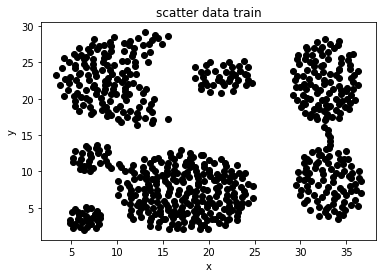

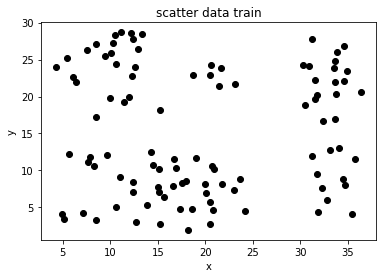

centroid ke - 0   36.55  7.0
centroid ke - 1   19.85  5.5
centroid ke - 2   7.5  28.25
centroid ke - 3   29.8  24.8
ini update centroid ke- 5
nilai centroi  1  yang baru. x= 32.845876288659795 | y= 8.814432989690726
nilai centroi  2  yang baru. x= 15.445328719723193 | y= 7.096712802768166
nilai centroi  3  yang baru. x= 9.765853658536582 | y= 22.339024390243903
nilai centroi  4  yang baru. x= 30.503985507246366 | y= 22.35978260869564
0 . ( 18.75 , 22.95 ) kelas =  3
1 . ( 21.45 , 21.45 ) kelas =  4
2 . ( 20.5 , 22.85 ) kelas =  4
3 . ( 20.65 , 24.3 ) kelas =  4
4 . ( 21.7 , 23.8 ) kelas =  4
5 . ( 23.1 , 21.7 ) kelas =  4
6 . ( 13.35 , 28.45 ) kelas =  3
7 . ( 12.4 , 27.85 ) kelas =  3
8 . ( 12.2 , 28.65 ) kelas =  3
9 . ( 12.9 , 26.5 ) kelas =  3
10 . ( 11.15 , 28.7 ) kelas =  3
11 . ( 10.5 , 28.35 ) kelas =  3
12 . ( 10.25 , 27.25 ) kelas =  3
13 . ( 12.6 , 24.05 ) kelas =  3
14 . ( 10.05 , 25.95 ) kelas =  3
15 . ( 8.5 , 27.05 ) kelas =  3
16 . ( 7.55 , 26.3 ) kelas =  3
17 . ( 9.4 

In [17]:
makeplot(xtrain,ytrain) #pembuatan plot untuk data train 
makeplot(xtest,ytest) #pembuatan plot untuk data test

isiCentroid(nilaiK) #inisialisasi atau pengisian centroid default dengan nilai random 
iterasi = 1
while True:
    # printisiCentroid(iterasi)
    # print(iterasi)
    hitungJarak() #untuk menentukan anggota untuk tiap centroid, berdasarkan jarak euclidian terkecil, di dalam hitungjarak() juga terdapat fungsi untuk perhitungan euclidian

    isiCentroidLama() #mengisi nilai centroid temporary dengan nilai centroid sebelumnya
    isiCentroidUpdate() #mengisi nilai centroid baru dengan nilai centroid yang baru

    iterasi += 1

    if konvergenCentroid(): #fungsi untuk dilakukan pengecekan konvergen kah nilai nilai centroid yang telah di hitung
        break

printisiCentroid(iterasi) #mengeluarkan nilai centroid yang paling baru
klasifikasiTest() #proses klasifikasi dari data test set, berdasarkan nilai centroid yang paling baru
printHasilTest() #mengeluarkan hasil klasifikasi dari test